# Within-LH segment class analysis
UMAP on LH segments to determine whether there is any within-class variation that can be described by the labelled predictors. 
Here, we run the UMAP and evaluation of the projection will take place in a separate notebook.

### Load dataframe

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.auto import tqdm
from joblib import Parallel, delayed
import umap
import pandas as pd

In [2]:
import avgn

In [3]:
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, FIGURE_DIR, ensure_dir
from avgn.signalprocessing.create_spectrogram_dataset import flatten_spectrograms
from avgn.visualization.spectrogram import draw_spec_set
from avgn.utils.general import save_fig
from avgn.visualization.projections import scatter_spec

In [6]:
DATASET_ID = "git_repos"

In [7]:
DT_ID = '2022-03-04_18-41-29'

In [8]:
seg_df = pd.read_pickle(DATA_DIR / DATASET_ID / DT_ID /  'segment_df_umap_combinedtidied.pickle')
seg_df[:3]

,start_time,end_time,labels,ID,start_times,end_times,call_label,call_start,seg_pos_call,call_unique_num,...,location,sex,wav_loc,key,rate,specs,umap,comb_labels,call_lab_simp,combi_lab_simp
0,0.753604,0.776773,DS,0,0.753604,0.776773,DSSHDS,0.753604,0,0,...,CRAWLEY,F,C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...,BWY MGGY Call Combo 1 290719 PM,44100,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[14.15081, 3.406464]",DS,DS-SH-DS,DS-SH-DS SH-LH
1,0.786865,0.835165,SH,1,0.786865,0.835165,DSSHDS,0.753604,1,0,...,CRAWLEY,F,C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...,BWY MGGY Call Combo 1 290719 PM,44100,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[5.388335, 10.057652]",SH,DS-SH-DS,DS-SH-DS SH-LH
2,0.855941,0.921160,DS,2,0.855941,0.921160,DSSHDS,0.753604,2,0,...,CRAWLEY,F,C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...,BWY MGGY Call Combo 1 290719 PM,44100,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[12.421062, 0.6991728]",DS,DS-SH-DS,DS-SH-DS SH-LH


In [9]:
len(seg_df)

1333

In [10]:
seg_df = seg_df.loc[(seg_df["comb_labels"]=="LH")]
seg_df[:3]

,start_time,end_time,labels,ID,start_times,end_times,call_label,call_start,seg_pos_call,call_unique_num,...,location,sex,wav_loc,key,rate,specs,umap,comb_labels,call_lab_simp,combi_lab_simp
5,0.980101,1.367130,LH,5,0.980101,1.367130,SHSHLH,0.932017,2,1,...,CRAWLEY,F,C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...,BWY MGGY Call Combo 1 290719 PM,44100,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-1.1012595, 2.4980214]",LH,SH-LH,DS-SH-DS SH-LH
2,1.482080,1.984961,HL,8,1.482080,1.984961,USHL,1.442686,1,3,...,CRAWLEY,F,C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...,BWY MGGY Call Combo 1 300719 AM,44100,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.547775, -0.013540553]",LH,SH-LH,DS SH-LH
3,1.471596,1.897371,LH,12,1.471596,1.897371,LH,1.471596,0,5,...,CRAWLEY,F,C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...,BWY MGGY Discrete 1 300719 AM,44100,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-1.0636147, 2.905301]",LH,LH,DS-SH-DS LH


In [11]:
len(seg_df)

203

In [12]:
seg_df.sort_values(by=['ID'], inplace=True)

BMYO 13


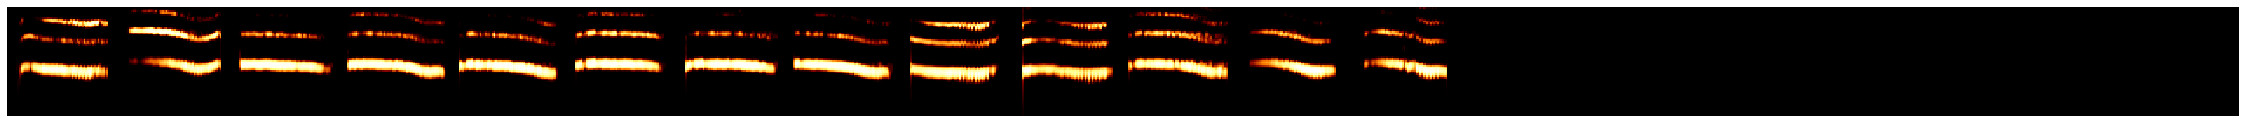

GBYM 16


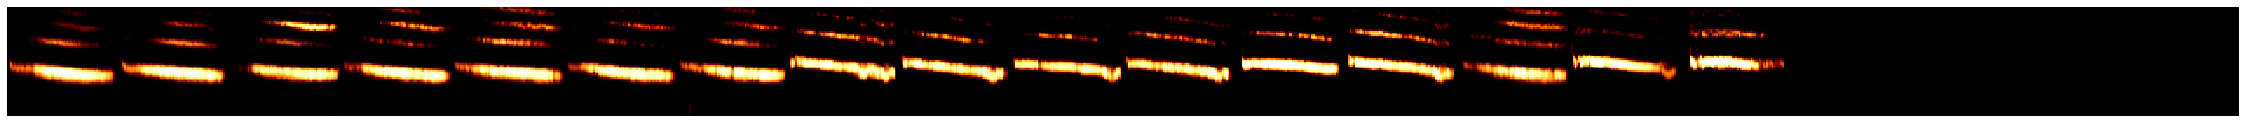

GON XF 19-21 6


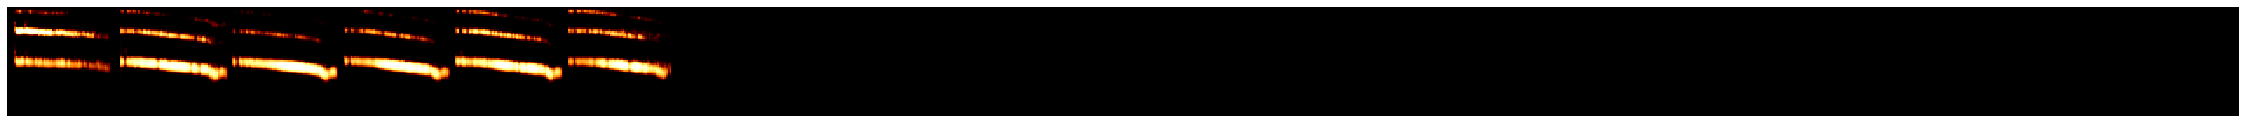

GON XM 20-21 1


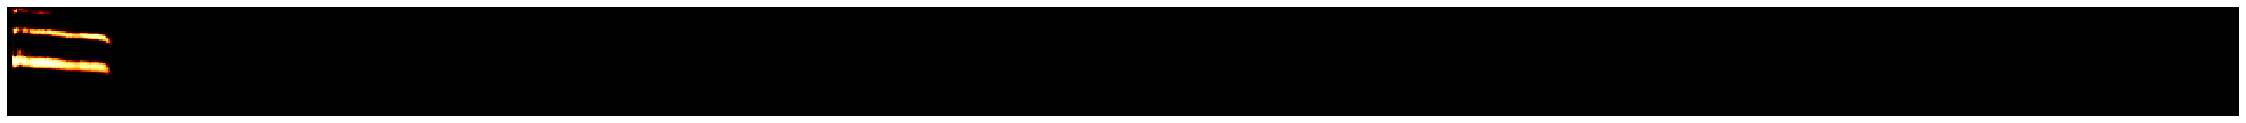

MGGY 11


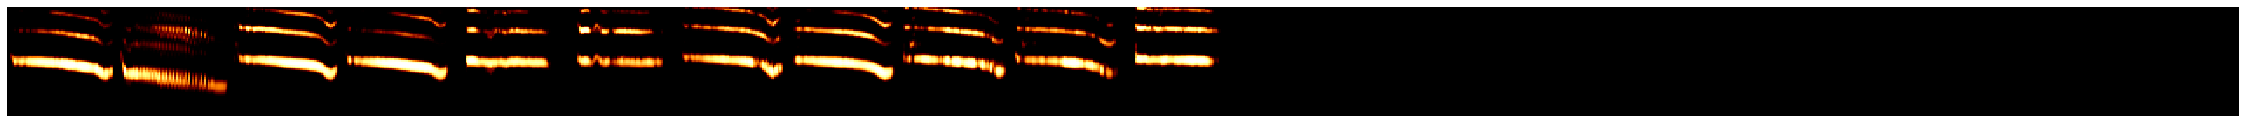

MOGO 9


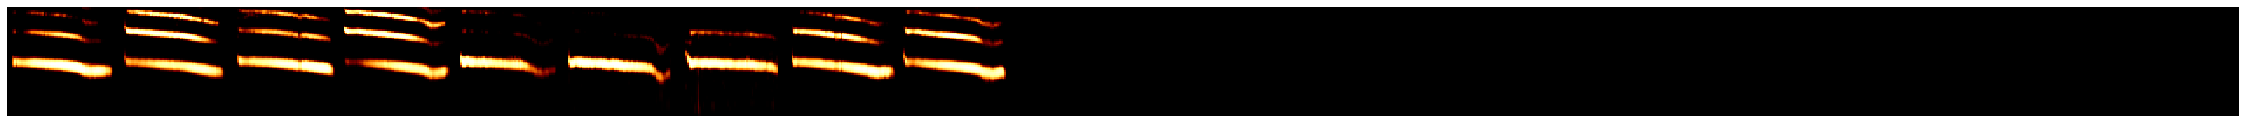

MOOO 6


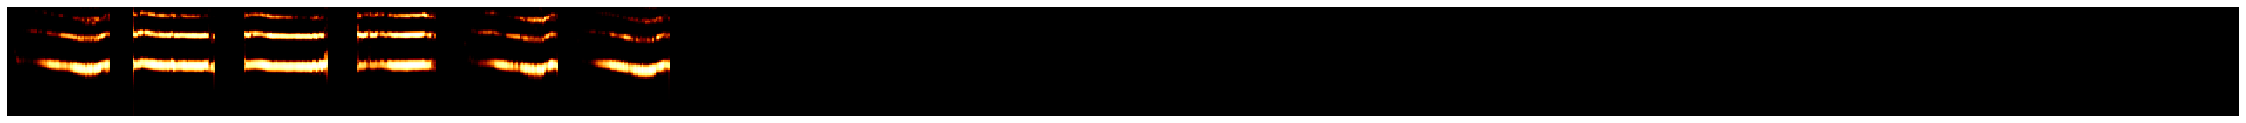

MORP 4


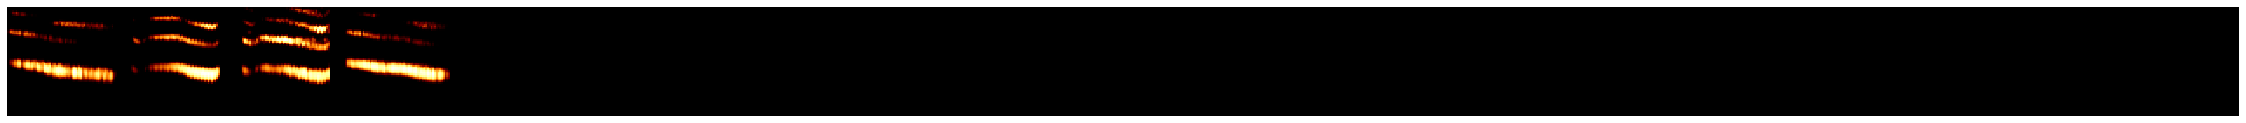

MOVY 5


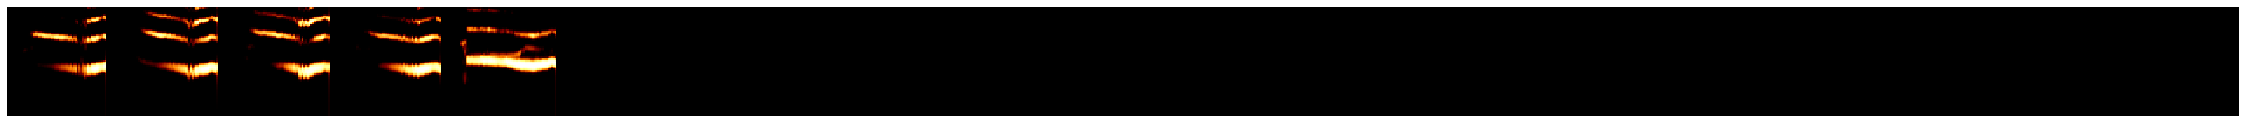

MRGO 12


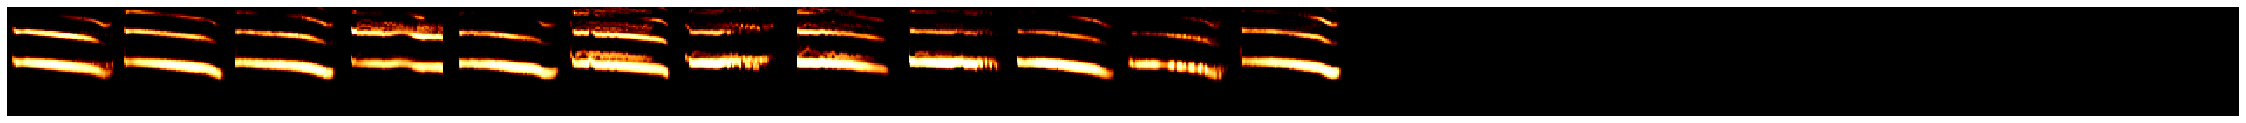

MXWW 4


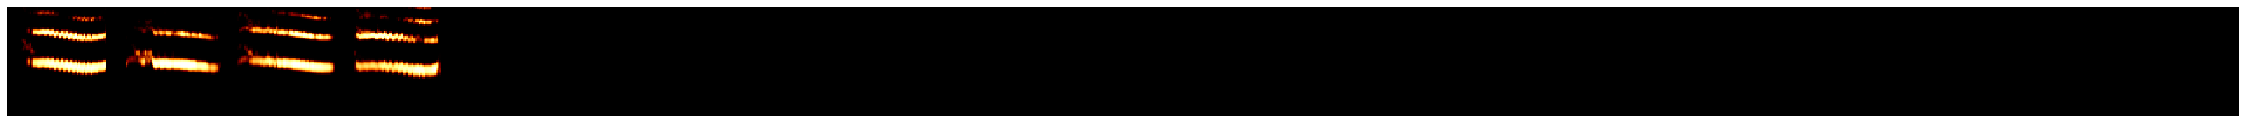

MXXGRY 18


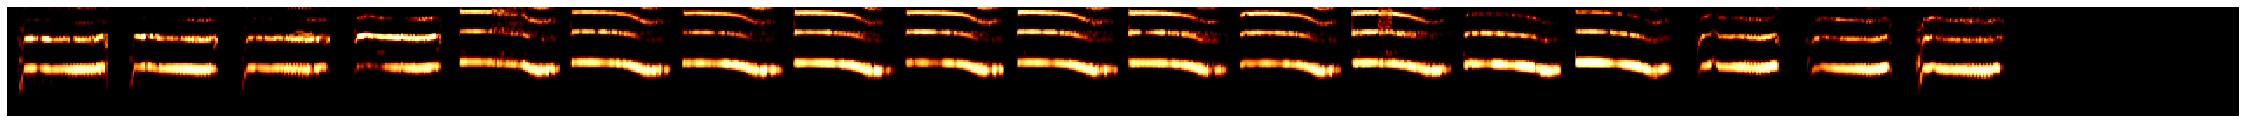

OMGO 21


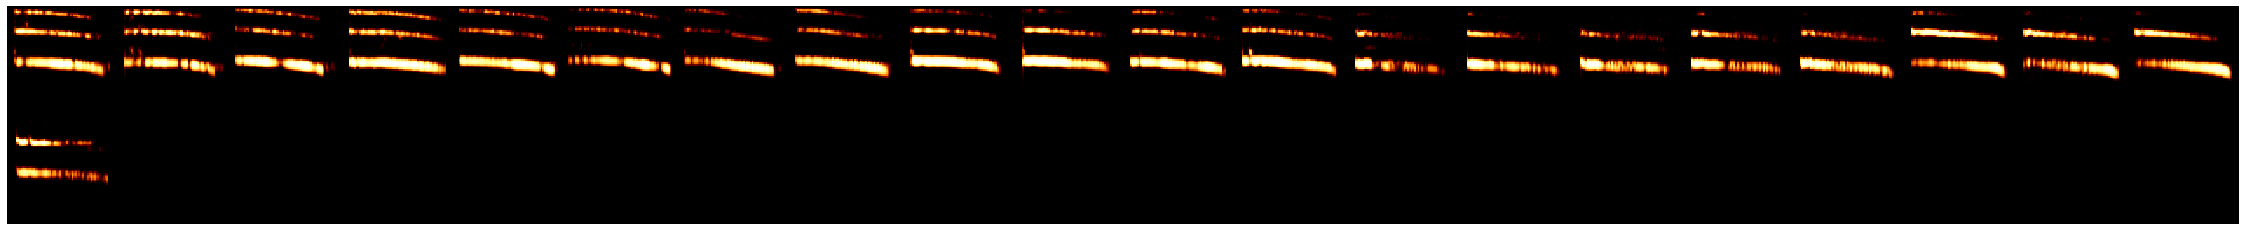

PMXRMX 3


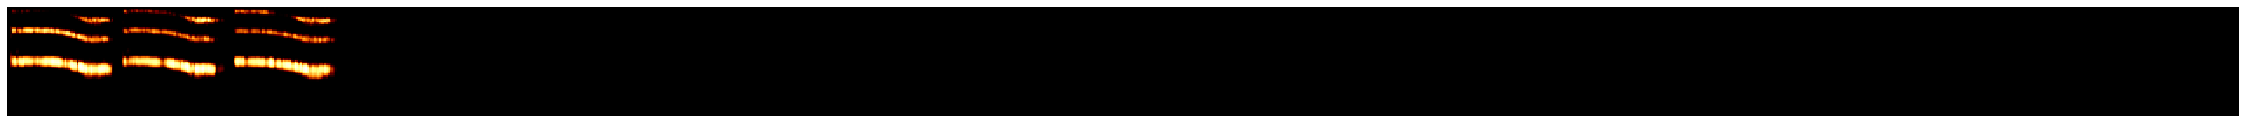

RMXGMX 11


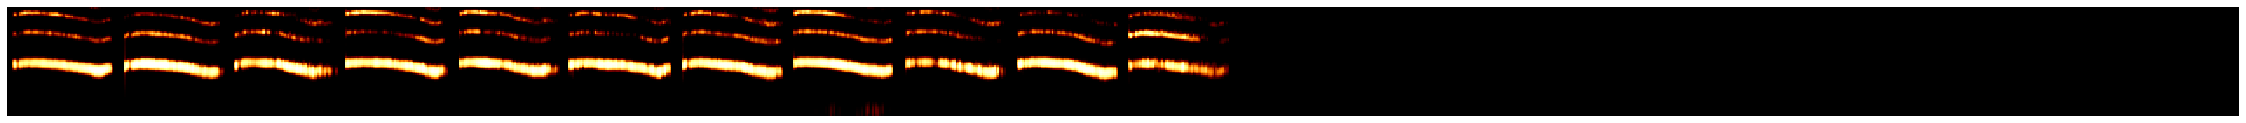

RMYG 8


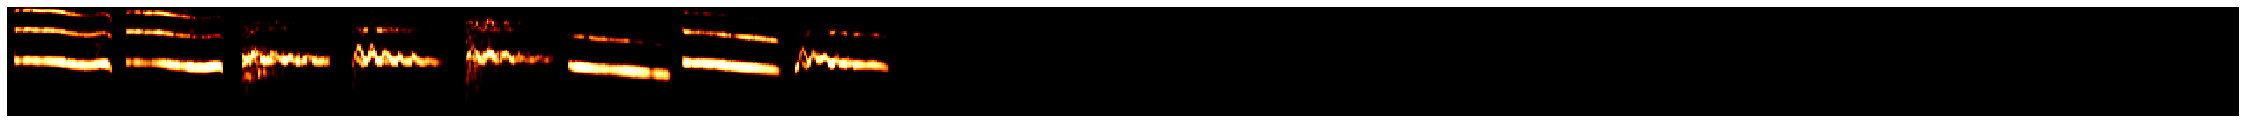

RYMR 3


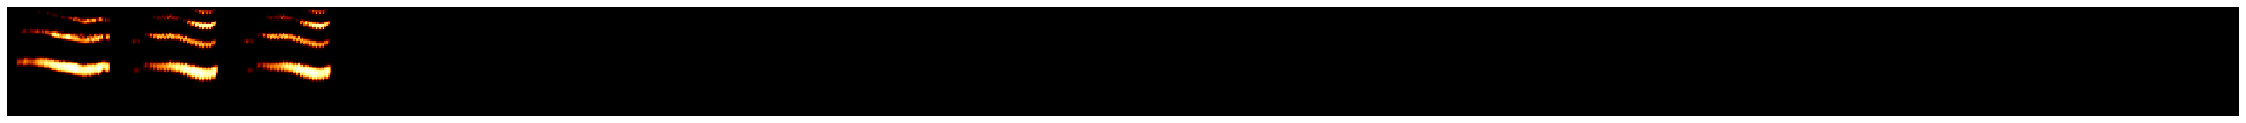

SCL XF 20-21 5


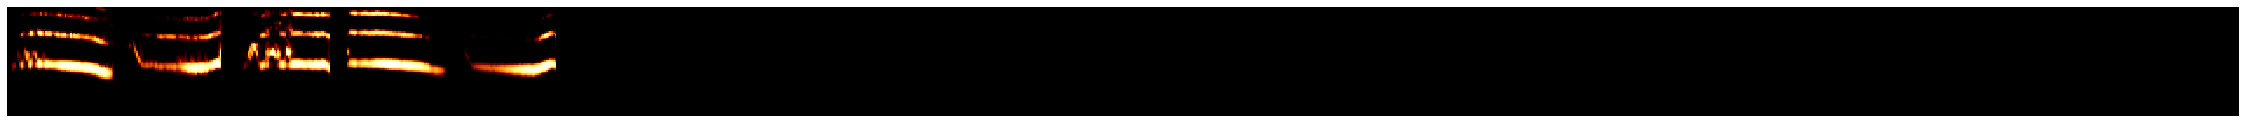

SCL XM 20-21 2


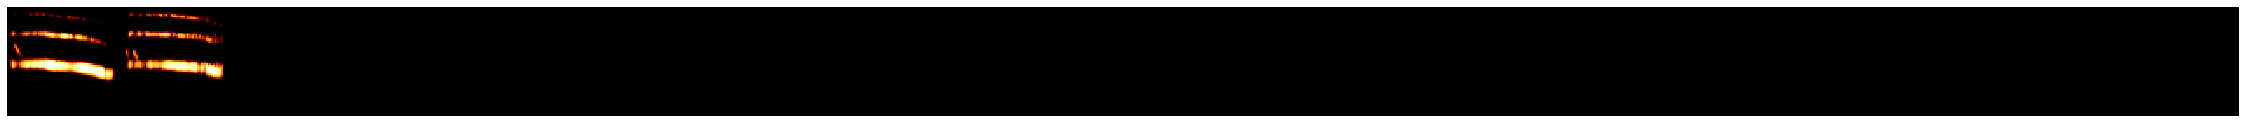

VVOM 15


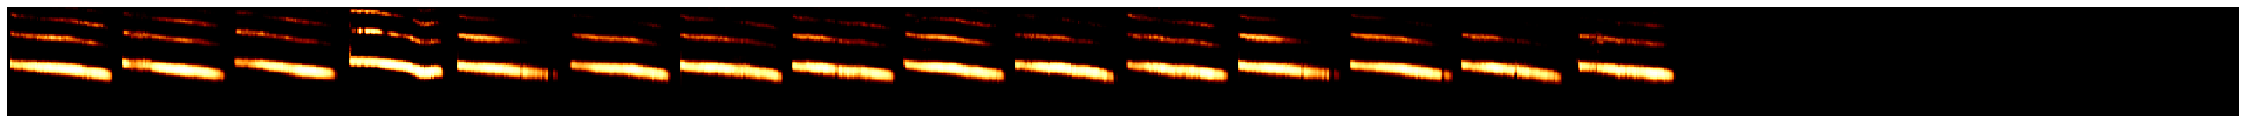

VVVM 25


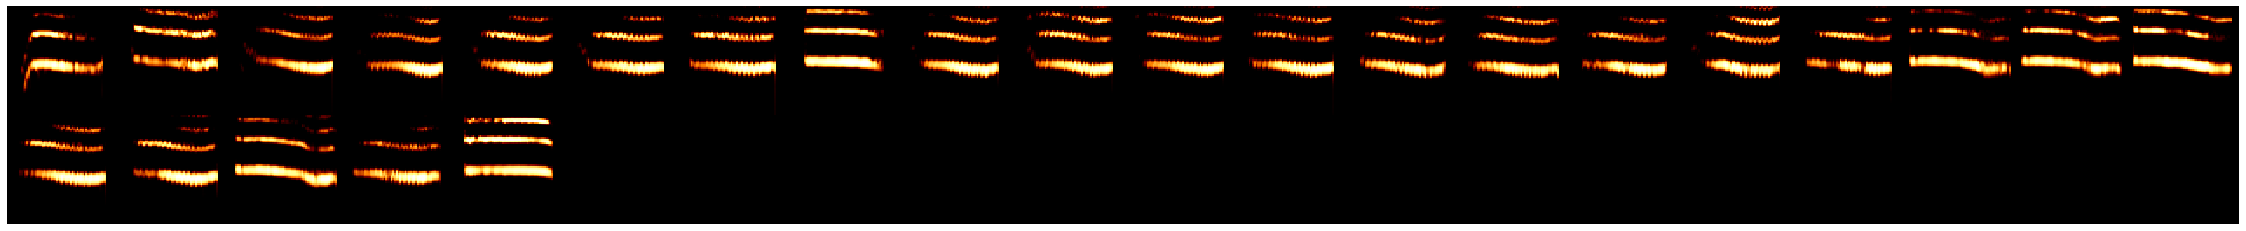

XF 20-21 5


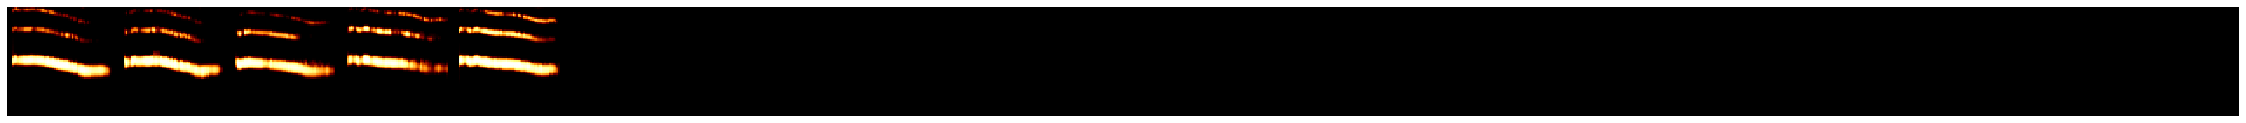

In [13]:
for indv in np.sort(seg_df.indv.unique()[:]):
    print(indv, np.sum(seg_df.indv == indv))
    specs = np.array([i/np.max(i) for i in seg_df[seg_df.indv == indv].specs.values])
    specs[specs<0] = 0
    
    draw_spec_set(specs, zoom=2,
                  maxrows=8, 
                  colsize=20)
    plt.show()

### Spectrograms for all individuals

In [14]:
def norm(x):
    return (x-np.min(x)) / (np.max(x) - np.min(x))

In [15]:
seg_df = seg_df[np.array([np.sum(i) > 0.0 for i in seg_df.specs.values])
]

In [16]:
specs = list(seg_df.specs.values)
specs = [norm(i) for i in tqdm(specs)]
specs_flattened = flatten_spectrograms(specs)
np.shape(specs_flattened)

  0%|          | 0/203 [00:00<?, ?it/s]

(203, 4096)

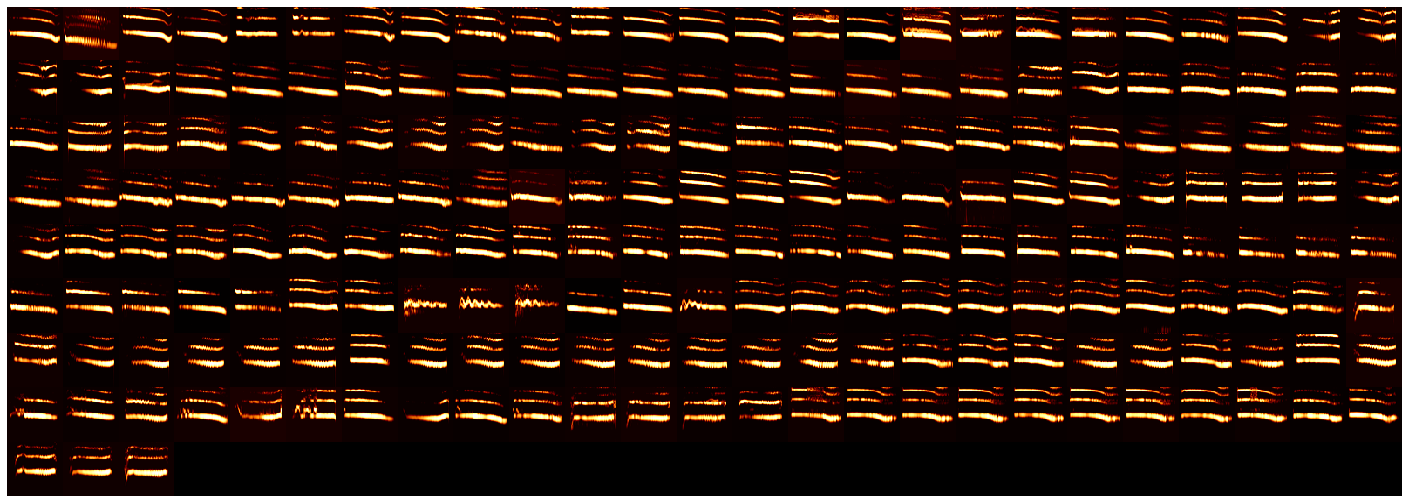

In [17]:
draw_spec_set(specs, zoom=1, maxrows=10, colsize=25)

In [24]:
fit = umap.UMAP(min_dist=0.0, verbose = True)
z = list(fit.fit_transform(specs_flattened))

UMAP(min_dist=0.0, verbose=True)
Construct fuzzy simplicial set
Thu Aug 18 02:17:56 2022 Finding Nearest Neighbors
Thu Aug 18 02:17:58 2022 Finished Nearest Neighbor Search
Thu Aug 18 02:18:00 2022 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Thu Aug 18 02:18:02 2022 Finished embedding


In [26]:
note_df['umap'] = list(z)

In [ ]:
nex = -1
scatter_spec(
    z,
    specs,
    column_size=10,
    #x_range = [-7,6],
    #y_range = [1,14],
    pal_color="hls",
    color_points=False,
    enlarge_points=0,
    figsize=(10, 10),
    range_pad = 0.15,
    scatter_kwargs = {
        'labels': seg_df.location.values,
        'alpha':1,
        's': 10,
        'show_legend': True,
        "color_palette": 'colorblind',
    },
    matshow_kwargs = {
        'cmap': plt.cm.Greys
    },
    line_kwargs = {
        'lw':0.5,
        'ls':"dashed",
        'alpha':0.25,
    },
    draw_lines=True,
    n_subset= 1000,
    border_line_width = 3,
    

);

In [31]:
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir

In [34]:
#save df
save_loc = DATA_DIR / DATASET_ID / 'LH' /  'LH_segment.pickle'
ensure_dir(save_loc.as_posix())
note_df.to_pickle(save_loc)